In [1]:

import importlib
import Util
importlib.reload(Util)
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import xarray as xr
import numpy as np
import dask

In [2]:
infile1_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_1/output/MOST_PLA.*.nc"
infile2_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_2/output/MOST_PLA.*.nc"
infile3_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_3/output/MOST_PLA.*.nc"
infile4_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_4/output/MOST_PLA.*.nc"
infile6_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_6/output/MOST_PLA.*.nc"
infile8_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_8/output/MOST_PLA.*.nc"
infile12_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_12/output/MOST_PLA.*.nc"
infile16_ml="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_16/output/MOST_PLA.*.nc"

In [3]:
data1ml = Util.open_mfdataset_plasim_monthly (infile1_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data2ml = Util.open_mfdataset_plasim_monthly (infile2_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data3ml = Util.open_mfdataset_plasim_monthly (infile3_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data4ml = Util.open_mfdataset_plasim_monthly (infile4_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data6ml = Util.open_mfdataset_plasim_monthly (infile6_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data8ml = Util.open_mfdataset_plasim_monthly (infile8_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data12ml = Util.open_mfdataset_plasim_monthly (infile12_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16ml = Util.open_mfdataset_plasim_monthly (infile16_ml, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

/usr/lib/python3/dist-packages/xarray/backends/plugins.py:68: RuntimeWarning: Engine 'cfgrib' loading failed:
xarray_plugin module needs xarray version >= 0.18+
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
teq_1_ml= data1ml.tas.isel(time=range(50*12, 150*12))
teq_2_ml= data2ml.tas.isel(time=range(50*12, 150*12))
teq_3_ml= data3ml.tas.isel(time=range(50*12, 150*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 150*12))
teq_6_ml= data6ml.tas.isel(time=range(50*12, 150*12))
teq_8_ml= data8ml.tas.isel(time=range(50*12, 150*12))
teq_12_ml= data12ml.tas.isel(time=range(50*12, 150*12))
teq_16_ml= data16ml.tas.isel(time=range(50*12, 150*12))

In [28]:
land_sea_mask.lon

<xarray.DataArray 'lon' (lon: 64)>
array([180.   , 185.625, 191.25 , 196.875, 202.5  , 208.125, 213.75 , 219.375,
       225.   , 230.625, 236.25 , 241.875, 247.5  , 253.125, 258.75 , 264.375,
       270.   , 275.625, 281.25 , 286.875, 292.5  , 298.125, 303.75 , 309.375,
       315.   , 320.625, 326.25 , 331.875, 337.5  , 343.125, 348.75 , 354.375,
         0.   ,   5.625,  11.25 ,  16.875,  22.5  ,  28.125,  33.75 ,  39.375,
        45.   ,  50.625,  56.25 ,  61.875,  67.5  ,  73.125,  78.75 ,  84.375,
        90.   ,  95.625, 101.25 , 106.875, 112.5  , 118.125, 123.75 , 129.375,
       135.   , 140.625, 146.25 , 151.875, 157.5  , 163.125, 168.75 , 174.375])
Coordinates:
  * lon      (lon) float64 180.0 185.6 191.2 196.9 ... 157.5 163.1 168.8 174.4
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [23]:
lsm = land_sea_mask.copy()
lsm = lsm.assign_coords(lon = (((lsm.lon + 180) % 360) - 180))

In [25]:
lsm.lon

<xarray.DataArray 'lon' (lon: 64)>
array([-180.   , -174.375, -168.75 , -163.125, -157.5  , -151.875, -146.25 ,
       -140.625, -135.   , -129.375, -123.75 , -118.125, -112.5  , -106.875,
       -101.25 ,  -95.625,  -90.   ,  -84.375,  -78.75 ,  -73.125,  -67.5  ,
        -61.875,  -56.25 ,  -50.625,  -45.   ,  -39.375,  -33.75 ,  -28.125,
        -22.5  ,  -16.875,  -11.25 ,   -5.625,    0.   ,    5.625,   11.25 ,
         16.875,   22.5  ,   28.125,   33.75 ,   39.375,   45.   ,   50.625,
         56.25 ,   61.875,   67.5  ,   73.125,   78.75 ,   84.375,   90.   ,
         95.625,  101.25 ,  106.875,  112.5  ,  118.125,  123.75 ,  129.375,
        135.   ,  140.625,  146.25 ,  151.875,  157.5  ,  163.125,  168.75 ,
        174.375])
Coordinates:
  * lon      (lon) float64 -180.0 -174.4 -168.8 -163.1 ... 163.1 168.8 174.4

NameError: name 'teq1ml' is not defined

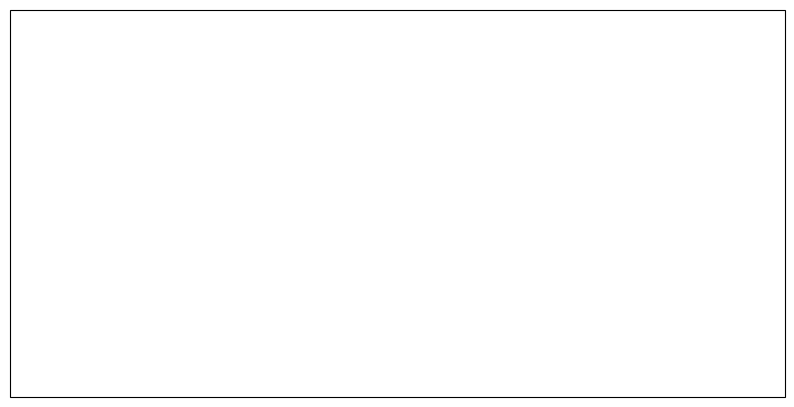

In [92]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs


mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']  # Adjust this name if it's different


fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

#teq1ml = teq_1_ml.isel(time=0)
teq1ml.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (°C)'})

mask_lon = land_sea_mask.lon
mask_lat = land_sea_mask.lat
ax.contour(mask_lon, mask_lat, land_sea_mask, levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

#ax.coastlines() 
ax.set_title("Surface Air Temperature (tas) with Land-Sea Mask Contour")
plt.show() #mean over time non solo un istante

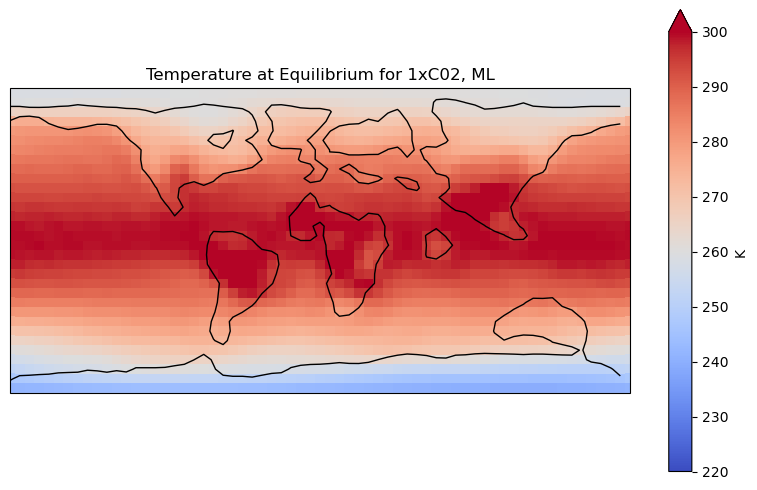

In [9]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# --- Assuming teq_ml_1 is already loaded ---
# 1. Time average
ice_eq_3_ml = teq_1_ml.mean(dim='time')

# 2. Roll longitudes and reassign to -180 to 180
ice_eq_3_ml= ice_eq_3_ml.roll(lon=len(ice_eq_3_ml['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(ice_eq_3_ml['lon']), endpoint=False)
ice_eq_3_ml['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ice_eq_3_ml.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
              cbar_kwargs={'label': 'K'}, vmin=220, vmax=300)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Temperature at Equilibrium for 1xC02, ML")
plt.show()

In [5]:
infile1_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_1/output/MOST_PLA.{:04d}.nc"
file_list_1 = [infile1_lsg.format(i) for i in range(1, 151)]

infile3_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_3/output/MOST_PLA.{:04d}.nc"
file_list_3 = [infile3_lsg.format(i) for i in range(1, 151)]

infile6_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_6/output/MOST_PLA.{:04d}.nc"
file_list_6 = [infile6_lsg.format(i) for i in range(1, 151)]

infile12_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_12/output/MOST_PLA.{:04d}.nc"
file_list_12 = [infile12_lsg.format(i) for i in range(1, 151)]

infile16_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_16/output/MOST_PLA.{:04d}.nc"
file_list_16 = [infile16_lsg.format(i) for i in range(1, 151)]

data1_lsg = Util.open_mfdataset_plasim_monthly (file_list_1, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data3_lsg = Util.open_mfdataset_plasim_monthly (file_list_3, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data6_lsg = Util.open_mfdataset_plasim_monthly (file_list_6, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data12_lsg = Util.open_mfdataset_plasim_monthly (file_list_12, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16_lsg = Util.open_mfdataset_plasim_monthly (file_list_16, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [6]:
t1= data1_lsg.tas
t3= data3_lsg.tas
t6= data6_lsg.tas
t12= data12_lsg.tas
t16= data16_lsg.tas

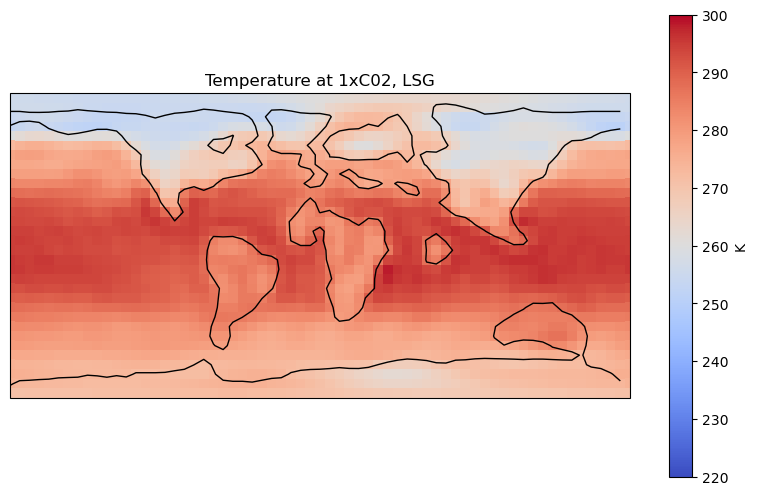

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# --- Assuming teq_ml_1 is already loaded ---
# 1. Time average
#t1 = t1.mean(dim='time')
#t16 = t16.mean(dim='time')

teq_diff = t1.mean(dim='time')
# 2. Roll longitudes and reassign to -180 to 180
teq_diff = teq_diff.roll(lon=len(teq_diff['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(teq_diff['lon']), endpoint=False)
teq_diff['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

teq_diff.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm',
              cbar_kwargs={'label': 'K'}, vmin=220, vmax=300)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Temperature at 1xC02, LSG")
plt.show()


In [ ]:
land_sea_mask

<xarray.DataArray 'lon' (lon: 64)>
array([  0.   ,   5.625,  11.25 ,  16.875,  22.5  ,  28.125,  33.75 ,  39.375,
        45.   ,  50.625,  56.25 ,  61.875,  67.5  ,  73.125,  78.75 ,  84.375,
        90.   ,  95.625, 101.25 , 106.875, 112.5  , 118.125, 123.75 , 129.375,
       135.   , 140.625, 146.25 , 151.875, 157.5  , 163.125, 168.75 , 174.375,
       180.   , 185.625, 191.25 , 196.875, 202.5  , 208.125, 213.75 , 219.375,
       225.   , 230.625, 236.25 , 241.875, 247.5  , 253.125, 258.75 , 264.375,
       270.   , 275.625, 281.25 , 286.875, 292.5  , 298.125, 303.75 , 309.375,
       315.   , 320.625, 326.25 , 331.875, 337.5  , 343.125, 348.75 , 354.375])
Coordinates:
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

In [20]:
land_sea_mask.roll(lon=32, roll_coords=True).lon

<xarray.DataArray 'lon' (lon: 64)>
array([180.   , 185.625, 191.25 , 196.875, 202.5  , 208.125, 213.75 , 219.375,
       225.   , 230.625, 236.25 , 241.875, 247.5  , 253.125, 258.75 , 264.375,
       270.   , 275.625, 281.25 , 286.875, 292.5  , 298.125, 303.75 , 309.375,
       315.   , 320.625, 326.25 , 331.875, 337.5  , 343.125, 348.75 , 354.375,
         0.   ,   5.625,  11.25 ,  16.875,  22.5  ,  28.125,  33.75 ,  39.375,
        45.   ,  50.625,  56.25 ,  61.875,  67.5  ,  73.125,  78.75 ,  84.375,
        90.   ,  95.625, 101.25 , 106.875, 112.5  , 118.125, 123.75 , 129.375,
       135.   , 140.625, 146.25 , 151.875, 157.5  , 163.125, 168.75 , 174.375])
Coordinates:
  * lon      (lon) float64 180.0 185.6 191.2 196.9 ... 157.5 163.1 168.8 174.4
Attributes:
    standard_name:  longitude
    long_name:      longitude
    units:          degrees_east
    axis:           X

Text(0.5, 1.0, 'Temperature Difference (16xCO2 - 1xCO2, ML)')

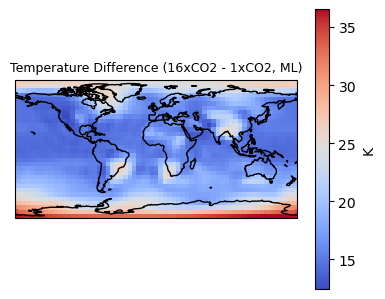

In [29]:
import cartopy.crs as ccrs

t_plot= teq_16_ml.mean(dim='time')- teq_1_ml.mean(dim='time')

title = "Temperature Difference (16xCO2 - 1xCO2, ML)"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='coolwarm')

ax.set_title(title, fontsize=9) 

In [17]:
tseq_1_ml= data1ml.ts.isel(time=range(50*12, 150*12))
tseq_2_ml= data2ml.ts.isel(time=range(50*12, 150*12))
tseq_3_ml= data3ml.ts.isel(time=range(50*12, 150*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 150*12))
tseq_6_ml= data6ml.ts.isel(time=range(50*12, 150*12))
tseq_8_ml= data8ml.ts.isel(time=range(50*12, 150*12))
tseq_12_ml= data12ml.ts.isel(time=range(50*12, 150*12))
tseq_16_ml= data16ml.ts.isel(time=range(50*12, 150*12))

Text(0.5, 1.0, 'Surface Temperature at Equilibrium for 1xCO2')

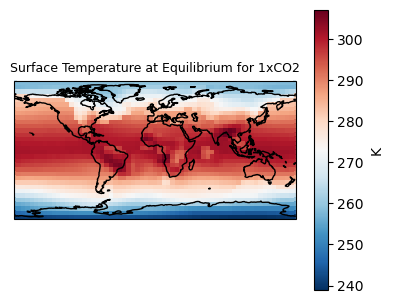

In [32]:
import cartopy.crs as ccrs

t_plot= tseq_1_ml.mean(dim='time')

title = "Surface Temperature at Equilibrium for 1xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='RdBu_r')

ax.set_title(title, fontsize=9) 

In [18]:
peq_1_ml = (data1ml.prc + data1ml.prl).isel(time=slice(50*12, 150*12))
peq_2_ml = (data2ml.prc + data2ml.prl).isel(time=slice(50*12, 150*12))
peq_3_ml = (data3ml.prc + data3ml.prl).isel(time=slice(50*12, 150*12))
#peq_4_ml = (data4ml.prc + data4ml.prl).isel(time=slice(50*12, 150*12))
peq_6_ml = (data6ml.prc + data6ml.prl).isel(time=slice(50*12, 150*12))
peq_8_ml = (data8ml.prc + data8ml.prl).isel(time=slice(50*12, 150*12))
peq_12_ml = (data12ml.prc + data12ml.prl).isel(time=slice(50*12, 150*12))
peq_16_ml = (data16ml.prc + data16ml.prl).isel(time=slice(50*12, 150*12))

Text(0.5, 1.0, 'Precipitation (Large Scale+Convective) for 3xCO2')

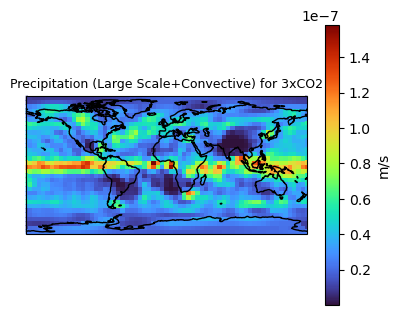

In [26]:
import cartopy.crs as ccrs

t_plot= peq_3_ml.mean(dim='time')

title = "Precipitation (Large Scale+Convective) for 3xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="m/s", nx=2, ny=2, nn=1, cmap='turbo')

ax.set_title(title, fontsize=9) 

In [59]:
infile3_ml_ice="/home/ighirardo/work/plasim/exp/test_h_ml/h_ml_3/output/MOST_ICE.*.nc"

In [60]:
data3ml_ice = Util.open_mfdataset_plasim_monthly (infile3_ml_ice, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [55]:
data1ml_ice.var 

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (time: 1800, bnds: 2, lon: 64, lat: 32)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 0150-12-01 00:00:00
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat        (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Dimensions without coordinates: bnds
Data variables: (12/25)
    time_bnds  (time, bnds) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    heata      (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    ofluxa     (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    tsfluxa    (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    smelta     (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    imelta     (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
   

In [60]:
data1ml_ice.icecc

<xarray.DataArray 'icecc' (time: 1800, lat: 32, lon: 64)>
dask.array<concatenate, shape=(1800, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0150-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         Ice cover computed prognostically
    units:             frac.
    code:              792
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

In [61]:
ice_eq_3_ml= data3ml_ice.icec.isel(time=range(50*12, 150*12))

Text(0.5, 1.0, 'Sea Ice Cover for 3xCO2')

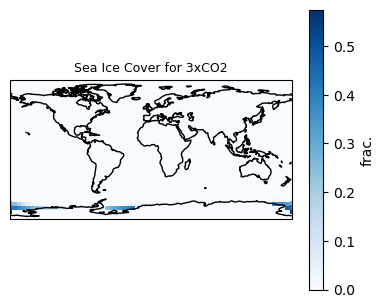

In [25]:
import cartopy.crs as ccrs

t_plot= ice_eq_3_ml.mean(dim='time')

title = "Sea Ice Cover for 3xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="frac.", nx=2, ny=2, nn=1, cmap='Blues')

ax.set_title(title, fontsize=9) 

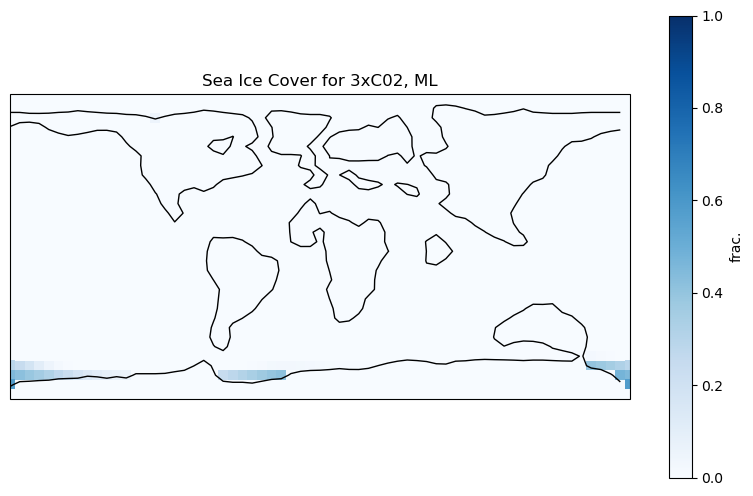

In [62]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load land-sea mask
mask_ds = xr.open_dataset("/home/ighirardo/work/plasim/exp/test_h_ml/lsm.nc")
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# --- Assuming teq_ml_1 is already loaded ---
# 1. Time average
ice_eq_3_ml = ice_eq_3_ml.mean(dim='time')

# 2. Roll longitudes and reassign to -180 to 180
ice_eq_3_ml= ice_eq_3_ml.roll(lon=len(ice_eq_3_ml['lon']) // 2, roll_coords=True)
new_lon = np.linspace(-180, 180, len(ice_eq_3_ml['lon']), endpoint=False)
ice_eq_3_ml['lon'] = new_lon

# 3. Roll land-sea mask too (to match longitude)
mask_ds = mask_ds.roll(lon=len(mask_ds['lon']) // 2, roll_coords=True)
mask_ds['lon'] = np.linspace(-180, 180, len(mask_ds['lon']), endpoint=False)
land_sea_mask = mask_ds['paleo_stddev_subgrid_topo']

# 4. Plot
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ice_eq_3_ml.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues',
              cbar_kwargs={'label': 'frac.'}, vmin=0, vmax=1)

ax.contour(mask_ds['lon'], mask_ds['lat'], land_sea_mask,
           levels=[0.5], colors='black', linewidths=1, transform=ccrs.PlateCarree())

ax.set_title("Sea Ice Cover for 3xC02, ML")
plt.show()


Text(0.5, 1.0, 'Difference in global mean temperature for various CO2 levels')

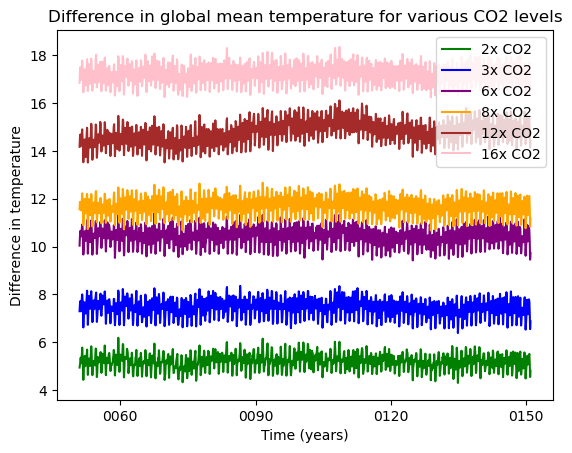

In [ ]:
diff2 = Util.area_mean(teq_2_ml).compute() - Util.area_mean(teq_1_ml).compute()
diff3 = Util.area_mean(teq_3_ml).compute() - Util.area_mean(teq_1_ml).compute()
#diff4 = Util.area_mean(teq_4_ml).compute() - Util.area_mean(teq_1_ml).compute()
diff6 = Util.area_mean(teq_6_ml).compute() - Util.area_mean(teq_1_ml).compute()
diff8 = Util.area_mean(teq_8_ml).compute() - Util.area_mean(teq_1_ml).compute()
diff12 = Util.area_mean(teq_12_ml).compute() - Util.area_mean(teq_1_ml).compute()
diff16 = Util.area_mean(teq_16_ml).compute() - Util.area_mean(teq_1_ml).compute()

diff2.plot(color='green')
diff3.plot(color='blue')
#diff4.plot(color='red')
diff6.plot(color='purple')
diff8.plot(color='orange')
diff12.plot(color='brown')
diff16.plot(color='pink')

plt.xlabel('Time (years)')
plt.ylabel('Difference in temperature')

plt.legend(['2x CO2', '3x CO2', '6x CO2', '8x CO2', '12x CO2', '16x CO2'])
plt.title('Difference in global mean temperature for various CO2 levels')

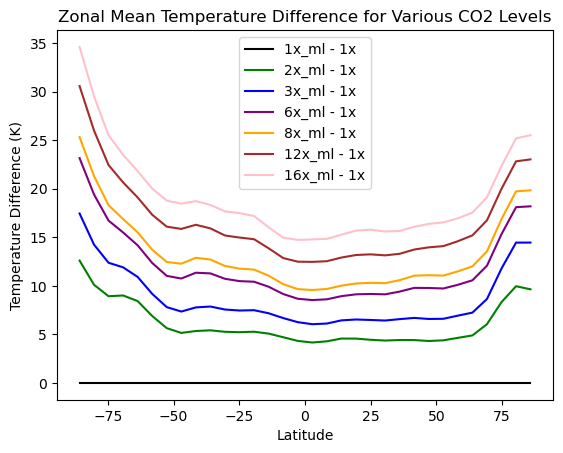

In [6]:
tas_diff_1ml = teq_1_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 1x_ml - 1x
tas_diff_2ml = teq_2_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 2x_ml - 1x
tas_diff_3ml = teq_3_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 3x_ml - 1x
tas_diff_6ml = teq_6_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 6x_ml - 1x
tas_diff_8ml = teq_8_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 8x_ml - 1x
tas_diff_12ml = teq_12_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 12x_ml - 1x
tas_diff_16ml = teq_16_ml.mean(dim=('time', 'lon')) - teq_1_ml.mean(dim=('time', 'lon')) # 16x_ml - 1x

tas_diff_1ml.plot(label='1x_ml - 1x', color='black')
tas_diff_2ml.plot(label='2x_ml - 1x', color='green')
tas_diff_3ml.plot(label='3x_ml - 1x', color='blue')
tas_diff_6ml.plot(label='6x_ml - 1x', color='purple')
tas_diff_8ml.plot(label='8x_ml - 1x', color='orange')
tas_diff_12ml.plot(label='12x_ml - 1x', color='brown')
tas_diff_16ml.plot(label='16x_ml - 1x', color='pink')

plt.xlabel('Latitude')
plt.ylabel('Temperature Difference (K)')
plt.legend()
plt.title('Zonal Mean Temperature Difference for Various CO2 Levels')
plt.show()

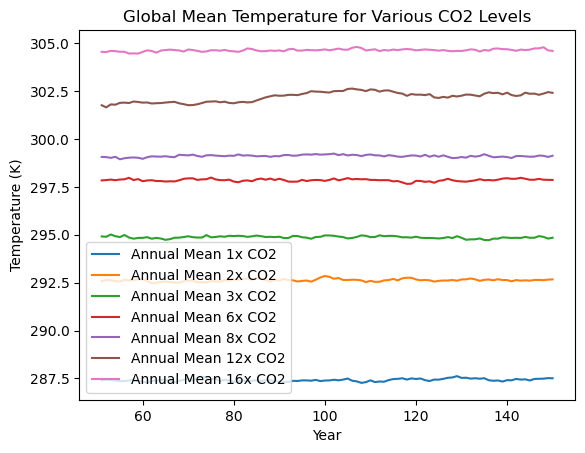

In [14]:
annual_mean1 = Util.area_mean(teq_1_ml).groupby("time.year").mean("time")
annual_mean2 = Util.area_mean(teq_2_ml).groupby("time.year").mean("time")
annual_mean3 = Util.area_mean(teq_3_ml).groupby("time.year").mean("time")
#annual_mean4 = Util.area_mean(teq_4).groupby("time.year").mean("time")
annual_mean6 = Util.area_mean(teq_6_ml).groupby("time.year").mean("time")
annual_mean8 = Util.area_mean(teq_8_ml).groupby("time.year").mean("time")
annual_mean12 = Util.area_mean(teq_12_ml).groupby("time.year").mean("time")
annual_mean16 = Util.area_mean(teq_16_ml).groupby("time.year").mean("time")

annual_mean1.plot(label="Annual Mean 1x CO2")
annual_mean2.plot(label="Annual Mean 2x CO2")
annual_mean3.plot(label="Annual Mean 3x CO2")
#annual_mean4.plot(label="Annual Mean 4x CO2")
annual_mean6.plot(label="Annual Mean 6x CO2")
annual_mean8.plot(label="Annual Mean 8x CO2")
annual_mean12.plot(label="Annual Mean 12x CO2")
annual_mean16.plot(label="Annual Mean 16x CO2")

plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Global Mean Temperature for Various CO2 Levels')
plt.legend()

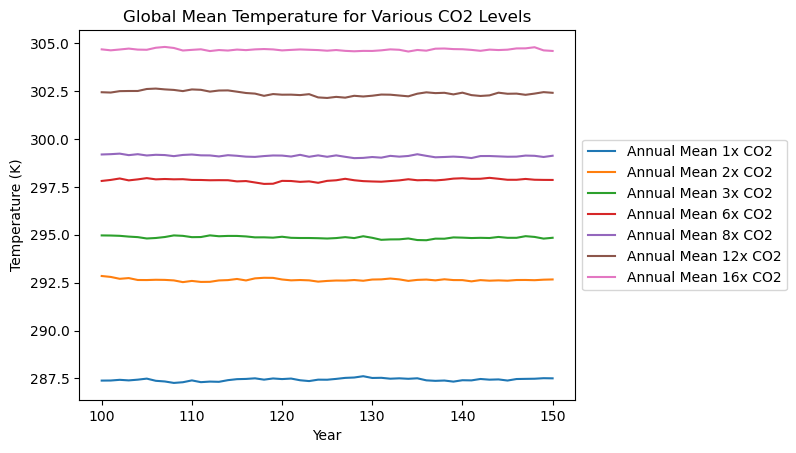

In [15]:
annual_mean1 = annual_mean1.sel(year=slice(100, 550))
annual_mean2 = annual_mean2.sel(year=slice(100, 550))
annual_mean3 = annual_mean3.sel(year=slice(100, 550))
#annual_mean4 = annual_mean4.sel(year=slice(101, 550))
annual_mean6 = annual_mean6.sel(year=slice(100, 550))
annual_mean8 = annual_mean8.sel(year=slice(100, 550))
annual_mean12 = annual_mean12.sel(year=slice(100, 550))
annual_mean16 = annual_mean16.sel(year=slice(100, 550))

annual_mean1.plot(label="Annual Mean 1x CO2")
annual_mean2.plot(label="Annual Mean 2x CO2")
annual_mean3.plot(label="Annual Mean 3x CO2")
#annual_mean4.plot(label="Annual Mean 4x CO2")
annual_mean6.plot(label="Annual Mean 6x CO2")
annual_mean8.plot(label="Annual Mean 8x CO2")
annual_mean12.plot(label="Annual Mean 12x CO2")
annual_mean16.plot(label="Annual Mean 16x CO2")

plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Global Mean Temperature for Various CO2 Levels')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

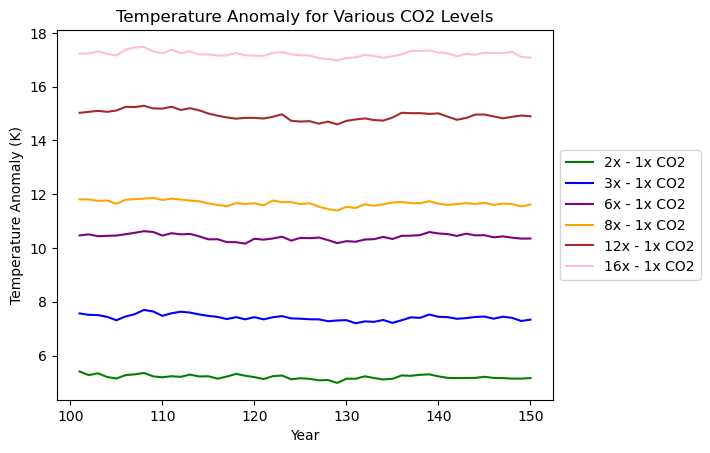

In [12]:

anomaly_2 = annual_mean2 - annual_mean1
anomaly_3 = annual_mean3 - annual_mean1
#anomaly_4 = annual_mean4 - annual_mean1
anomaly_6 = annual_mean6 - annual_mean1
anomaly_8 = annual_mean8 - annual_mean1
anomaly_12 = annual_mean12 - annual_mean1
anomaly_16 = annual_mean16 - annual_mean1

anomaly_2.plot(label="2x - 1x CO2", color='green')
anomaly_3.plot(label="3x - 1x CO2", color='blue')
#anomaly_4.plot(label="4x - 1x CO2", color='red')
anomaly_6.plot(label="6x - 1x CO2", color='purple')
anomaly_8.plot(label="8x - 1x CO2", color='orange')
anomaly_12.plot(label="12x - 1x CO2", color='brown')
anomaly_16.plot(label="16x - 1x CO2", color='pink')

plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (K)')
plt.title('Temperature Anomaly for Various CO2 Levels')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
infile1_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_1/output/MOST_PLA.{:04d}.nc"
file_list_1 = [infile1_lsg.format(i) for i in range(1, 151)]

infile3_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_3/output/MOST_PLA.{:04d}.nc"
file_list_3 = [infile3_lsg.format(i) for i in range(1, 151)]

infile6_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_6/output/MOST_PLA.{:04d}.nc"
file_list_6 = [infile6_lsg.format(i) for i in range(1, 151)]

infile12_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_12/output/MOST_PLA.{:04d}.nc"
file_list_12 = [infile12_lsg.format(i) for i in range(1, 151)]

infile16_lsg="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_16/output/MOST_PLA.{:04d}.nc"
file_list_16 = [infile16_lsg.format(i) for i in range(1, 151)]

In [132]:
data1_lsg = Util.open_mfdataset_plasim_monthly (file_list_1, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data3_lsg = Util.open_mfdataset_plasim_monthly (file_list_3, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data6_lsg = Util.open_mfdataset_plasim_monthly (file_list_6, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

data12_lsg = Util.open_mfdataset_plasim_monthly (file_list_12, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)
data16_lsg = Util.open_mfdataset_plasim_monthly (file_list_16, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [38]:
infile3_pla_oce="/home/ighirardo/work/plasim/exp/test_pla_lsg/test3_lsg/output/MOST_OCE.*.nc"


In [39]:
data3_pla_oce = Util.open_mfdataset_plasim_monthly (infile3_pla_oce, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [40]:
infile3_oce="/home/ighirardo/work/plasim/exp/test_h_lsg/h_lsg_3/output/MOST_OCE.*.nc"

In [41]:
data3_oce = Util.open_mfdataset_plasim_monthly (infile3_oce, concat_dim="time", combine="nested", use_cftime=True, decode_times=False)

In [9]:
data1_oce.var

<bound method ImplementsDatasetReduce._reduce_method.<locals>.wrapped_func of <xarray.Dataset>
Dimensions:    (time: 12000, bnds: 2, lon: 64, lat: 32)
Coordinates:
  * time       (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon        (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat        (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) float64 dask.array<chunksize=(12, 2), meta=np.ndarray>
    heata      (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    ifluxa     (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    fssta      (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    dssta      (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    qhda       (time, lat, lon) float32 dask.array<chunksize=(12, 32, 64), meta=np.ndarray>
    fldoa 

In [22]:
data1_oce.sst


<xarray.DataArray 'sst' (time: 12000, lat: 32, lon: 64)>
dask.array<concatenate, shape=(12000, 32, 64), dtype=float32, chunksize=(12, 32, 64), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 1000-12-01 00:00:00
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * lat      (lat) float64 85.76 80.27 74.74 69.21 ... -74.74 -80.27 -85.76
Attributes:
    long_name:         SST (ML ocean temperature)
    units:             K
    code:              939
    CDI_grid_type:     gaussian
    CDI_grid_num_LPE:  16
    cell_methods:      time: mean

Text(0.5, 1.0, 'Difference in Sea Surface Temperature for 3xCO2')

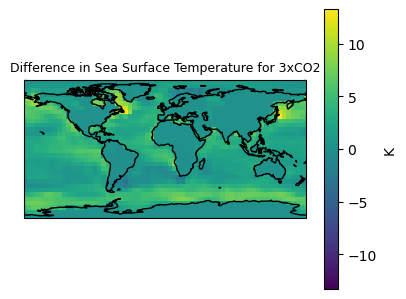

In [42]:
import cartopy.crs as ccrs

t_plot= data3_pla_oce.sst.mean(dim='time') - data3_oce.sst.mean(dim='time')

title = "Difference in Sea Surface Temperature for 3xCO2"
fig,ax = Util.plot_map_2D(t_plot, title=title, units="K", nx=2, ny=2, nn=1, cmap='viridis')

ax.set_title(title, fontsize=9) 

In [90]:

teq_1_lsg= data1_lsg.tas.isel(time=range(50*12, 151*12))
#teq_2_ml= data2ml.tas.isel(time=range(50*12, 600*12))
teq_3_lsg= data3_lsg.tas.isel(time=range(50*12, 151*12))
#teq_4_ml= data4ml.tas.isel(time=range(50*12, 600*12))
teq_6_lsg= data6_lsg.tas.isel(time=range(50*12, 151*12))
#teq_8_ml= data8ml.tas.isel(time=range(50*12, 600*12))
teq_12_lsg= data12_lsg.tas.isel(time=range(50*12, 151*12))
teq_16_lsg= data16_lsg.tas.isel(time=range(50*12, 151*12))

IndexError: index 1800 is out of bounds for axis 0 with size 1800

In [133]:

teq_1_lsg= data1_lsg.tas
teq_3_lsg= data3_lsg.tas
teq_6_lsg= data6_lsg.tas
teq_12_lsg= data12_lsg.tas
teq_16_lsg= data16_lsg.tas

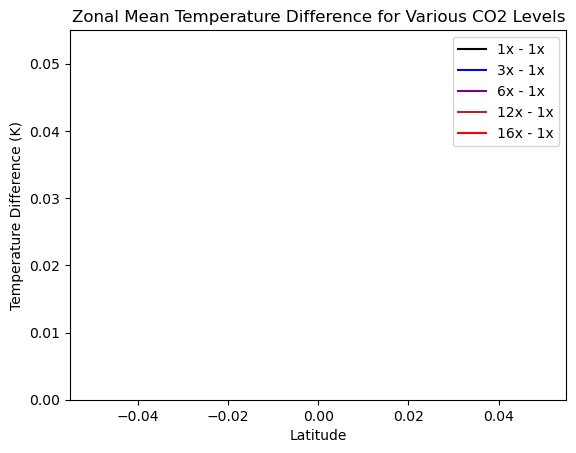

In [134]:
tas_diff_1lsg = teq_1_lsg.mean(dim=('time', 'lon')) - teq_1_lsg.mean(dim=('time', 'lon')) # 1x_ml - 1x
#tas_diff_2lsg = teq_2.mean(dim=('time', 'lon')) - teq_1.mean(dim=('time', 'lon')) # 2x_ml - 1x
tas_diff_3lsg = teq_3_lsg.mean(dim=('time', 'lon')) - teq_1_lsg.mean(dim=('time', 'lon')) # 3x_ml - 1x
tas_diff_6lsg = teq_6_lsg.mean(dim=('time', 'lon')) - teq_1_lsg.mean(dim=('time', 'lon')) # 6x_ml - 1x
#tas_diff_8ml = teq_8.mean(dim=('time', 'lon')) - teq_1.mean(dim=('time', 'lon')) # 8x_ml - 1x
tas_diff_12lsg = teq_12_lsg.mean(dim=('time', 'lon')) - teq_1_lsg.mean(dim=('time', 'lon')) # 12x_ml - 1x
tas_diff_16lsg = teq_16_lsg.mean(dim=('time', 'lon')) - teq_1_lsg.mean(dim=('time', 'lon')) # 16x_ml - 1x

tas_diff_1lsg.plot(label='1x - 1x', color='black')
#tas_diff_2ml.plot(label='2x_ml - 1x', color='green')
tas_diff_3lsg.plot(label='3x - 1x', color='blue')
tas_diff_6lsg.plot(label='6x - 1x', color='purple')
#tas_diff_8ml.plot(label='8x_ml - 1x', color='orange')
tas_diff_12lsg.plot(label='12x - 1x', color='brown')
tas_diff_16lsg.plot(label='16x - 1x', color='red')

plt.xlabel('Latitude')
plt.ylabel('Temperature Difference (K)')
plt.legend()
plt.title('Zonal Mean Temperature Difference for Various CO2 Levels')
plt.ylim(bottom=0)

plt.show()

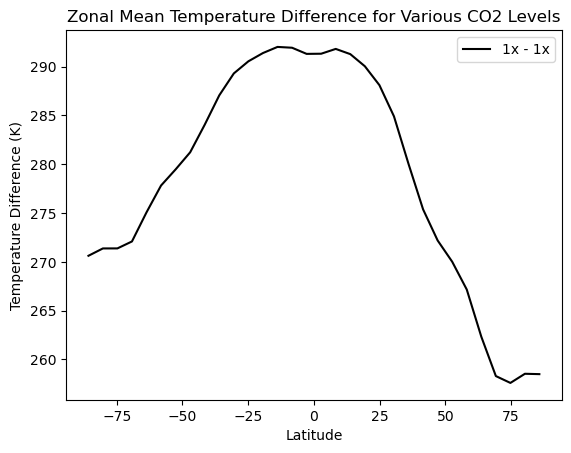

In [70]:
teq_1_lsg= data1_lsg.tas
tas_diff_1lsg = teq_1_lsg.mean(dim=('time', 'lon'))
tas_diff_1lsg.plot(label='1x - 1x', color='black')
plt.xlabel('Latitude')
plt.ylabel('Temperature Difference (K)')
plt.legend()
plt.title('Zonal Mean Temperature Difference for Various CO2 Levels')
plt.show()